In [7]:
SMALL_SIZE, MEDIUM_SIZE = 9, 12
#PROJECT_PATH = "/Users/donghur/Desktop/Research/Murthy/BM_GPU"
PROJECT_PATH = "/Users/lukefoster/Documents/CompEtho/BM_GPU"

In [8]:
import sys
import numpy as np
from glob import glob
import random, matplotlib
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

sys.path.append(PROJECT_PATH)
from utils.data import Dataset

In [9]:
import utils.figure as ufigure
%load_ext autoreload
%autoreload 1
%aimport utils.data
%aimport utils.figure

In [10]:
CONFIG_PATH = f"{PROJECT_PATH}/config_prac.yaml"
RESULT_PATH = f"{PROJECT_PATH}/results/final_prac_premade"

Data = Dataset(PROJECT_PATH, CONFIG_PATH)
Data.load_data()

  0%|          | 0/141 [00:00<?, ?it/s]

Loading config.yaml ...
Finished loading config
Loading INFO.yaml ...
Finished loading INFO


100%|██████████| 141/141 [00:13<00:00, 10.54it/s]


In [11]:
# configuration
INFO = Data.info
INFO_values = Data.info_values
config = Data.config
skeleton = config['skeleton']
skeleton_color= config['skeleton_color']

# features
bp = Data.data_obj['bodypoints']
rot_bp = Data.data_obj['rotated_bodypoints']
angles = Data.data_obj['angles']
limbs = Data.data_obj['limbs']
angle_power = Data.data_obj['angle_power']
limb_power = Data.data_obj['limb_power']

<hr><hr>

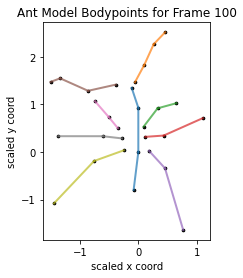

In [14]:
ufigure.ant_model(rot_bp, skeleton, skeleton_color, fr=100)

<hr>

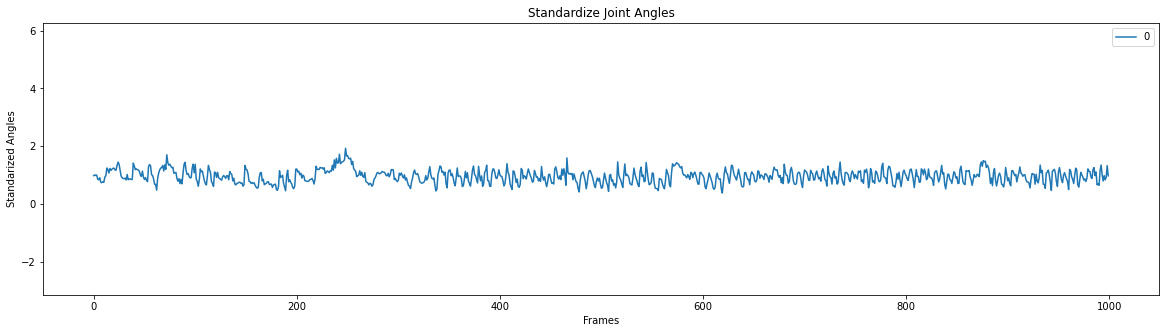

In [31]:
fig, ax = plt.subplots(figsize=(20,5))

start_fr, stop_fr = 0, 1000
ax.plot(np.arange(start_fr,stop_fr), angles[start_fr:stop_fr,5])
ax.set(xlabel="Frames", ylabel="Standarized Angles", title="Standardize Joint Angles", ylim=(-3.14,6.26))
plt.legend(np.arange(angles.shape[1]))
plt.show()

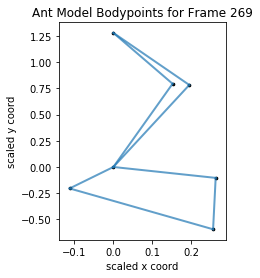

In [93]:
ufigure.ant_model(rot_bp, skeleton, skeleton_color, fr=269)

In [78]:
np.where(angles[:,0]>3)

(array([  64037,   78847,  185702,  185711,  234270,  246267,  424031,
         426414,  452307,  452916,  486011,  589558,  589560,  602299,
         748699,  810299,  811105,  820275,  822292,  905867, 1013440,
        1013702]),)

<hr>

# Check Angle Scaling

In [167]:
import pickle
with open (f"{PROJECT_PATH}/{config['result_path']}/angle_scale_model.pickle", 'rb') as file:
    angle_scaler = pickle.load(file)
with open (f"{PROJECT_PATH}/{config['result_path']}/limb_scale_model.pickle", 'rb') as file:
    limb_scaler = pickle.load(file)

In [168]:
print(np.min(angles, axis=0))
print(np.max(angles, axis=0))

stand_angles = angle_scaler.transform(angles) - angle_scaler.scaled_means_

print(np.min(stand_angles, axis=0))
print(np.max(stand_angles, axis=0))

[-3.14060985  0.          0.          0.          0.         -3.14159265
  0.          0.          0.        ]
[3.14159265 6.28188153 6.28318531 6.28318531 6.28318531 3.14159265
 6.28255422 6.28290753 6.28318531]
[-1.32256714 -1.49790043 -1.49845003 -1.68694367 -2.00607834 -1.31917286
 -1.63987171 -1.63678376 -1.42260059]
[ 0.67743286  0.50209957  0.50154997  0.31305633 -0.00607834  0.68082714
  0.36012829  0.36321624  0.57739941]


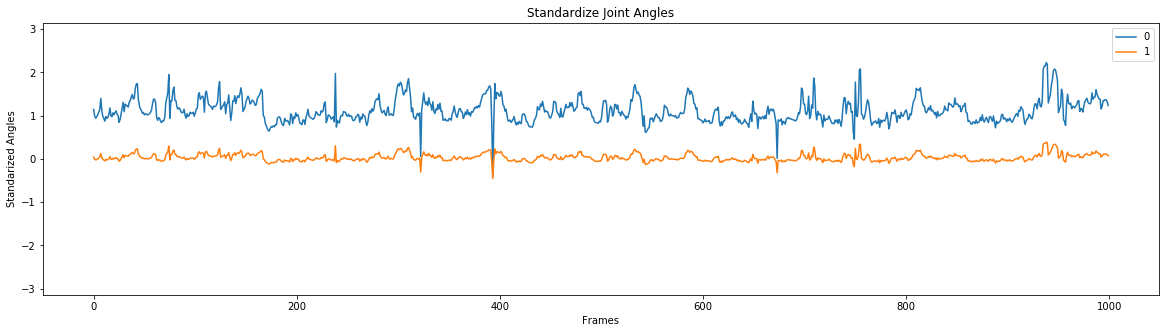

In [172]:
fig, ax = plt.subplots(figsize=(20,5))

start_fr, stop_fr = 0, 1000
ax.plot(np.arange(start_fr,stop_fr), angles[start_fr:stop_fr,0])
ax.plot(np.arange(start_fr,stop_fr), stand_angles[start_fr:stop_fr,0])
ax.set(xlabel="Frames", ylabel="Standarized Angles", title="Standardize Joint Angles", ylim=(-3.14,3.14))
plt.legend(np.arange(angles.shape[1]))
plt.show()

# Check Limb Scaling

In [179]:
print(np.min(limbs, axis=0))
print(np.max(limbs, axis=0))

stand_limbs = limb_scaler.transform(limbs) - limb_scaler.scaled_means_

print(np.min(stand_limbs, axis=0))
print(np.max(stand_limbs, axis=0))

[0.02479339 0.         0.00826446 0.        ]
[2.8111932  2.59477811 2.86414614 2.16965367]
[-1.39561113 -1.36336891 -1.68779679 -1.57167626]
[0.60438887 0.63663109 0.31220321 0.42832374]


In [183]:
np.max(angle_scaler.transform(angles))

1.0

# Check Power Range

In [192]:
# Postural Range
print(np.max(angle_scaler.transform(angles), axis=(0))-np.min(angle_scaler.transform(angles), axis=(0)))
print(np.max(limb_scaler.transform(limbs), axis=(0))-np.min(limb_scaler.transform(limbs), axis=(0)))

[2. 2. 2. 2. 2. 2. 2. 2. 2.]
[2. 2. 2. 2.]


In [193]:
print(np.max(angle_power, axis=(0,1))-np.min(angle_power, axis=(0,1)))
print(np.max(limb_power, axis=(0,1))-np.min(limb_power, axis=(0,1)))

[3.39445589 5.92007743 5.7875585  7.60622883 9.14101884 8.44169553
 8.74096701 6.96534523 7.01535675]
[5.07828    4.81182366 5.0027586  5.45758321]
